# Credit card fraud model

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
fraud=pd.read_csv("creditcard_csv.csv")

In [5]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>],
       [<Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>,
        <Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>],
       [<Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>,
        <Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>],
       [<Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>,
        <Axes: title={'center': 'V24'}>],
       [<Axes: title={'center': 'V25'}>, <Axes: title={'ce

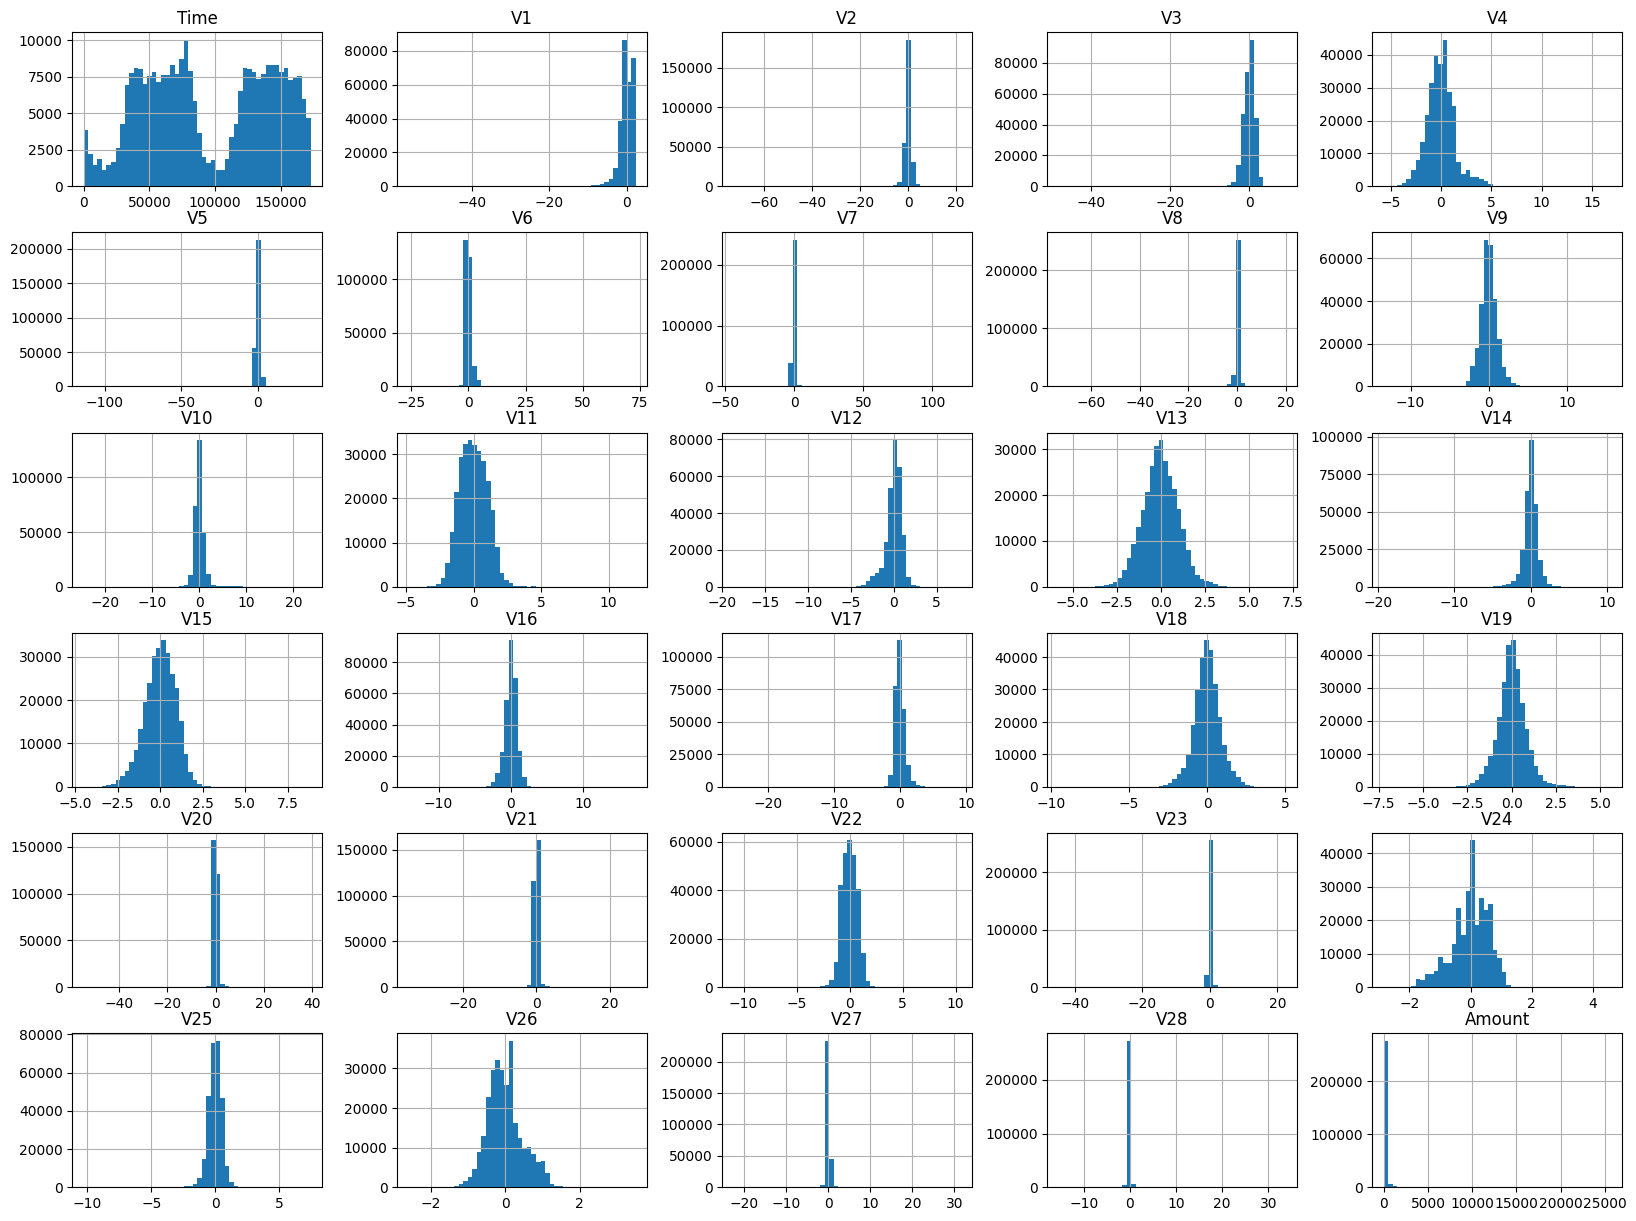

In [8]:
%matplotlib inline
fraud.hist(bins=50, figsize=(20, 15))

## Train test splitting

In [9]:
#import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(fraud, 0.2)

In [11]:
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in train set: 227846
 Rows in test set: 56961


In [12]:
from sklearn.model_selection import train_test_split
train_test, test_set = train_test_split(fraud, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in train set: 227846
 Rows in test set: 56962


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(fraud, fraud['Class']):
    strat_train_set = fraud.loc[train_index]
    strat_test_set = fraud.loc[test_index]

In [14]:
strat_test_set['Class'].value_counts()

Class
'0'    56864
'1'       98
Name: count, dtype: int64

In [15]:
strat_train_set['Class'].value_counts()

Class
'0'    227451
'1'       394
Name: count, dtype: int64

In [16]:
#56864/98

In [17]:
#227451/394

## Looking for correlations

In [18]:
fraud_numeric = fraud.apply(pd.to_numeric, errors='coerce')

corr_matrix = fraud_numeric.corr()

In [19]:
corr_matrix['Amount'].sort_values(ascending=False)

Amount    1.000000
V7        0.397311
V20       0.339403
V6        0.215981
V21       0.105999
V4        0.098732
V18       0.035650
V14       0.033751
V27       0.028825
V28       0.010258
V17       0.007309
V13       0.005293
V24       0.005146
V11       0.000104
V15      -0.002986
V26      -0.003208
V16      -0.003910
V12      -0.009542
Time     -0.010596
V9       -0.044246
V25      -0.047837
V19      -0.056151
V22      -0.064801
V10      -0.101502
V8       -0.103079
V23      -0.112633
V3       -0.210880
V1       -0.227709
V5       -0.386356
V2       -0.531409
Class          NaN
Name: Amount, dtype: float64

array([[<Axes: xlabel='Amount', ylabel='Amount'>,
        <Axes: xlabel='Time', ylabel='Amount'>,
        <Axes: xlabel='V5', ylabel='Amount'>,
        <Axes: xlabel='V9', ylabel='Amount'>,
        <Axes: xlabel='V15', ylabel='Amount'>,
        <Axes: xlabel='V21', ylabel='Amount'>,
        <Axes: xlabel='V26', ylabel='Amount'>,
        <Axes: xlabel='V28', ylabel='Amount'>],
       [<Axes: xlabel='Amount', ylabel='Time'>,
        <Axes: xlabel='Time', ylabel='Time'>,
        <Axes: xlabel='V5', ylabel='Time'>,
        <Axes: xlabel='V9', ylabel='Time'>,
        <Axes: xlabel='V15', ylabel='Time'>,
        <Axes: xlabel='V21', ylabel='Time'>,
        <Axes: xlabel='V26', ylabel='Time'>,
        <Axes: xlabel='V28', ylabel='Time'>],
       [<Axes: xlabel='Amount', ylabel='V5'>,
        <Axes: xlabel='Time', ylabel='V5'>,
        <Axes: xlabel='V5', ylabel='V5'>,
        <Axes: xlabel='V9', ylabel='V5'>,
        <Axes: xlabel='V15', ylabel='V5'>,
        <Axes: xlabel='V21', ylabel='V5'>

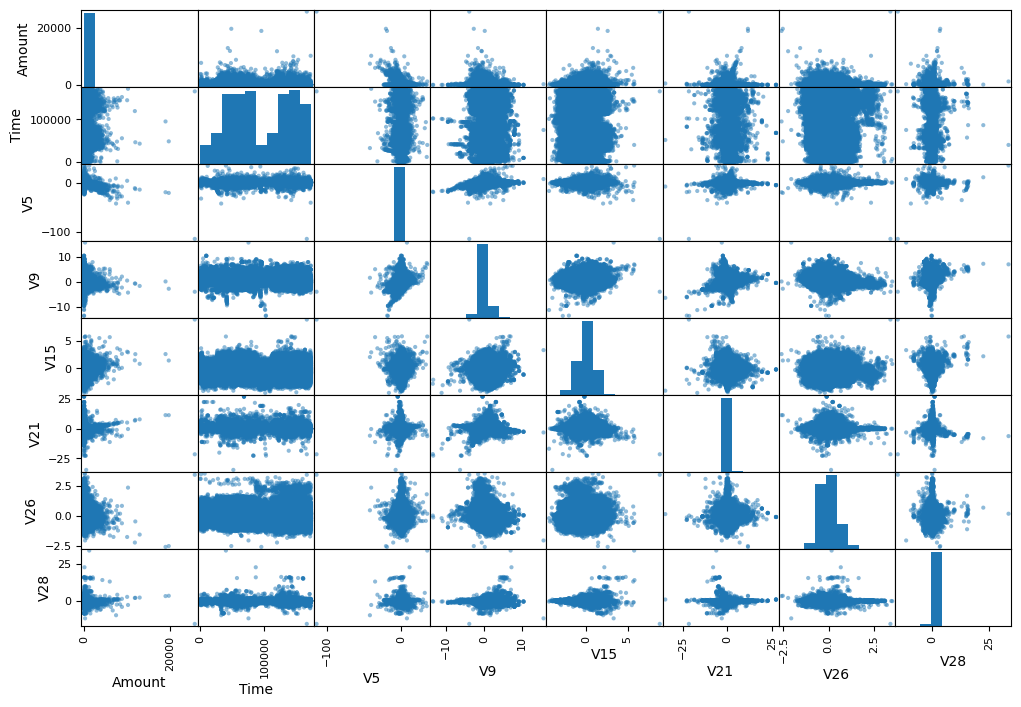

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["Amount", "Time", "V5", "V9", "V15", "V21", "V26", "V28"]
scatter_matrix(fraud[attributes], figsize = (12, 8))

<Axes: xlabel='Time', ylabel='Amount'>

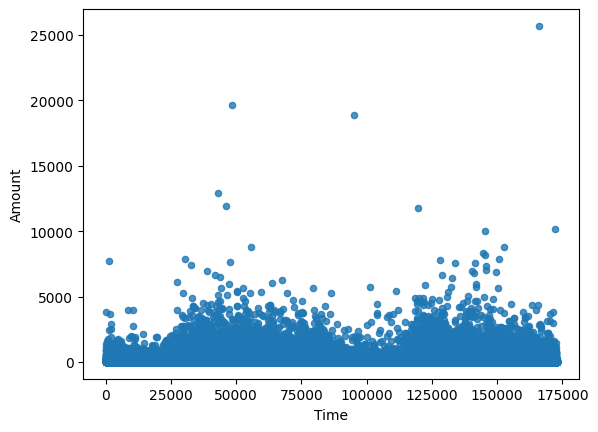

In [21]:
fraud.plot(kind="scatter",x="Time", y="Amount", alpha = 0.8)

## Trying out attributes combination

In [22]:
fraud['AmtTime'] = fraud['Amount']/fraud['Time']

In [23]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmtTime
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0',inf
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0',inf
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0',378.660
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0',123.500
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0',34.995


In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

In [25]:
fraud_numeric = fraud.apply(pd.to_numeric, errors='coerce')
corr_matrix = fraud_numeric.corr()
corr_matrix['Amount'].sort_values(ascending=False)

Amount     1.000000
V7         0.397311
V20        0.339403
V6         0.215981
V21        0.105999
V4         0.098732
V18        0.035650
V14        0.033751
V27        0.028825
AmtTime    0.013772
V28        0.010258
V17        0.007309
V13        0.005293
V24        0.005146
V11        0.000104
V15       -0.002986
V26       -0.003208
V16       -0.003910
V12       -0.009542
Time      -0.010596
V9        -0.044246
V25       -0.047837
V19       -0.056151
V22       -0.064801
V10       -0.101502
V8        -0.103079
V23       -0.112633
V3        -0.210880
V1        -0.227709
V5        -0.386356
V2        -0.531409
Class           NaN
Name: Amount, dtype: float64

<Axes: xlabel='AmtTime', ylabel='Amount'>

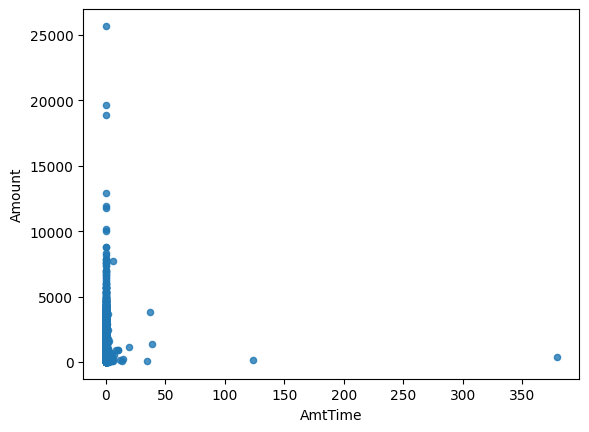

In [26]:
fraud.plot(kind="scatter",x="AmtTime", y="Amount", alpha = 0.8)

<Axes: xlabel='Amount', ylabel='AmtTime'>

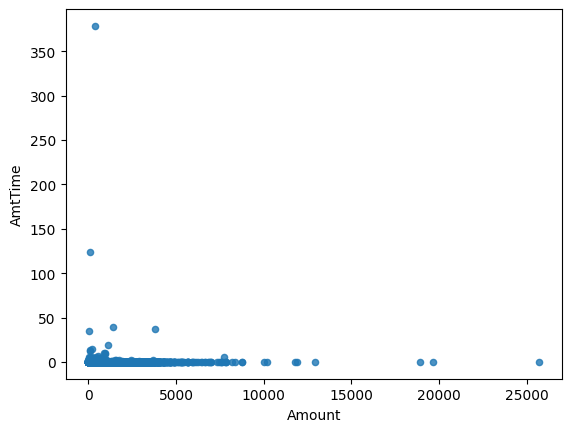

In [27]:
fraud.plot(kind="scatter",x="Amount", y="AmtTime", alpha = 0.8)

## For missing attributes

In [28]:
#Delete those row, or Delete that particular coloumn or change the missing value to 0, mean or median

In [29]:
import sklearn

In [30]:
from sklearn.pipeline import Pipeline


In [31]:
print(fraud['Class'].unique())


["'0'" "'1'"]


In [32]:
import pandas as pd

fraud['Class'] = fraud['Class'].str.strip("'").astype(int)


In [33]:
# Check for missing values
missing_values = fraud.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
AmtTime    0
dtype: int64


In [34]:
# Check data type of the 'Class' column
class_data_type = fraud['Class'].dtype
print("Data type of 'Class' column:", class_data_type)

# Get statistical summary of the 'Class' column
class_summary = fraud['Class'].describe()
print("Statistical summary of 'Class' column:\n", class_summary)


Data type of 'Class' column: int32
Statistical summary of 'Class' column:
 count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


In [35]:
import numpy as np

# Check the data type of the target variable 'Class'
print("Data type of target variable 'Class':", fraud['Class'].dtype)

# Check if 'Class' contains any missing values
print("Number of missing values in target variable 'Class':", fraud['Class'].isnull().sum())

# Check if 'Class' contains any infinity or extremely large values
print("Number of infinity or extremely large values in target variable 'Class':", np.isinf(fraud['Class']).sum())

# Handle missing values by dropping the corresponding rows
fraud = fraud.dropna(subset=['Class'])

# Handle infinity or extremely large values by replacing them with NaN
fraud = fraud.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in 'Class'
fraud = fraud.dropna(subset=['Class'])

# Convert 'Class' to the appropriate data type (e.g., int)
fraud['Class'] = fraud['Class'].astype(int)


Data type of target variable 'Class': int32
Number of missing values in target variable 'Class': 0
Number of infinity or extremely large values in target variable 'Class': 0


In [36]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform the missing values
fraud_imputed = imputer.fit_transform(fraud)

# Create a new DataFrame with imputed values
fraud = pd.DataFrame(fraud_imputed, columns=fraud.columns)


In [37]:
from sklearn.linear_model import LinearRegression

y = fraud['Class']
model = LinearRegression()
model.fit(fraud, y)


LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
y_pred = model.predict(fraud)

# Evaluate the model using mean squared error
mse = mean_squared_error(fraud['Class'], y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.442888009606456e-31


In [55]:
list(y_pred)

[8.160468109372696e-17,
 1.0035256689391178e-16,
 3.9522274323048816e-15,
 1.2046282302498014e-15,
 4.204797649417679e-16,
 2.4774466046478586e-17,
 -1.3532036055746072e-16,
 7.083206148022234e-16,
 2.96869415854577e-16,
 1.9286646078200079e-16,
 -1.4452677047098028e-16,
 1.4072259073051855e-16,
 1.3826298017975828e-16,
 -1.384806619373038e-16,
 5.895943652442824e-16,
 2.971711895762946e-16,
 -5.4786343052559844e-17,
 1.649131973609981e-16,
 2.686076528010979e-16,
 -1.2539377769338022e-16,
 6.201462824724795e-17,
 -2.5987597196391106e-16,
 -2.892975860171973e-16,
 -2.1917937167933324e-17,
 2.4153883152834295e-16,
 -8.316946622583172e-17,
 -1.4674149464051123e-17,
 -3.3885600877526695e-16,
 -1.4930912861207703e-16,
 -1.1465257570263506e-16,
 -6.34875077606791e-17,
 -3.1711739790290636e-16,
 -2.801302129255322e-16,
 -2.801302129255322e-16,
 -2.866985531078179e-16,
 -2.866985531078179e-16,
 -1.1238845378587046e-16,
 -3.1114022382056826e-16,
 -2.9393645475991965e-16,
 -2.246338567595095e-1